In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('D:\Data\PythonProjects\PythonTraining\GeekBrains\Урок_4_Материалы\winequality-red.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [5]:
df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

In [6]:
df['good'].value_counts()

1    855
0    744
Name: good, dtype: int64

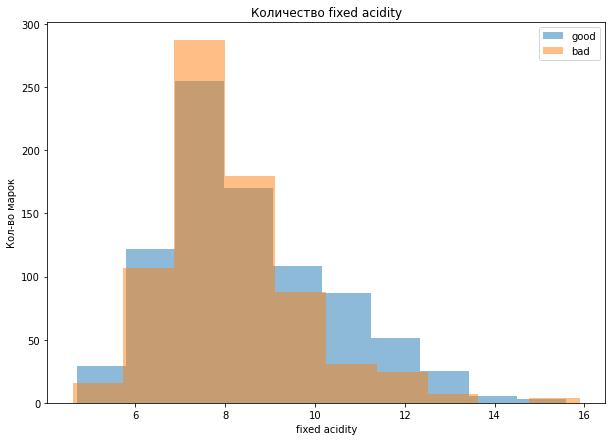

In [9]:
plt.figure(figsize = (10,7))

plt.hist(df['fixed acidity'].loc[df['good'] == 1], alpha = 0.5, label = 'good')
plt.hist(df['fixed acidity'].loc[df['good'] == 0], alpha = 0.5, label = 'bad')


plt.title('Количество fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('Кол-во марок')
plt.legend()

plt.show()

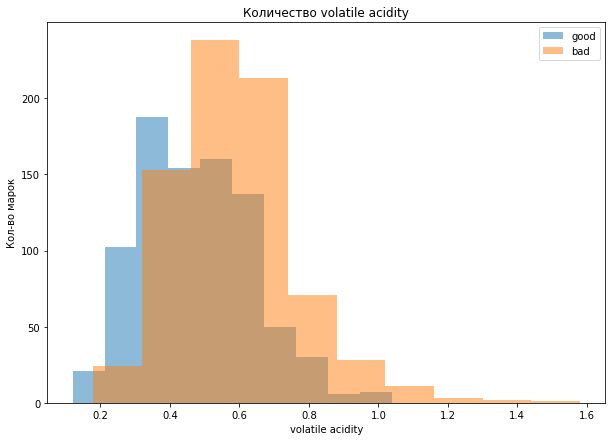

In [10]:
plt.figure(figsize = (10,7))

plt.hist(df['volatile acidity'].loc[df['good'] == 1], alpha = 0.5, label = 'good')
plt.hist(df['volatile acidity'].loc[df['good'] == 0], alpha = 0.5, label = 'bad')


plt.title('Количество volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Кол-во марок')
plt.legend()

plt.show()

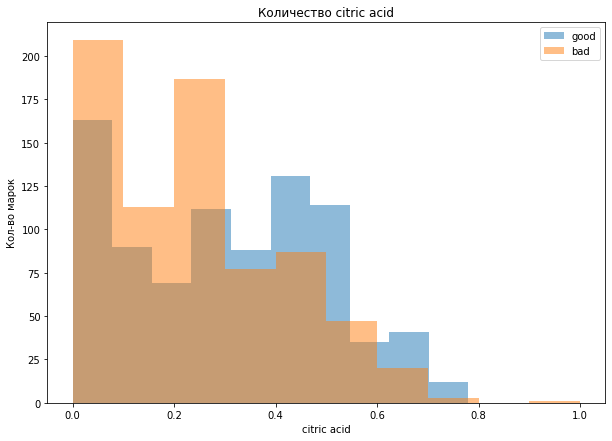

In [11]:
plt.figure(figsize = (10,7))

plt.hist(df['citric acid'].loc[df['good'] == 1], alpha = 0.5, label = 'good')
plt.hist(df['citric acid'].loc[df['good'] == 0], alpha = 0.5, label = 'bad')


plt.title('Количество citric acid')
plt.xlabel('citric acid')
plt.ylabel('Кол-во марок')
plt.legend()

plt.show()

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


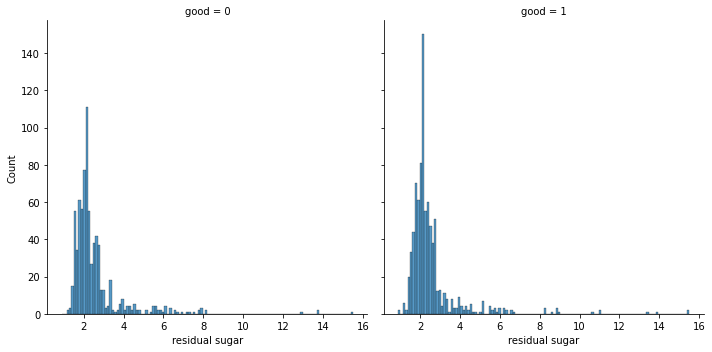

In [13]:
sns.displot(df, x="residual sugar", col="good")

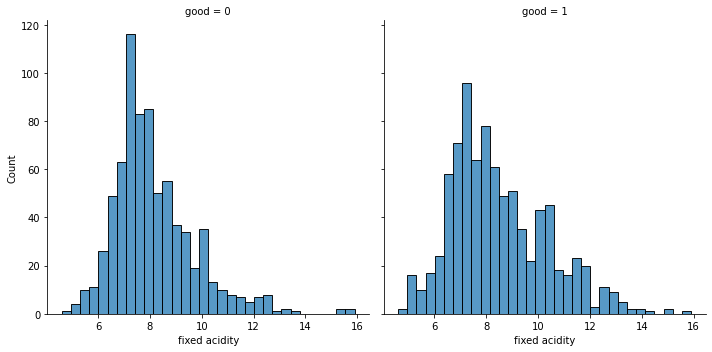

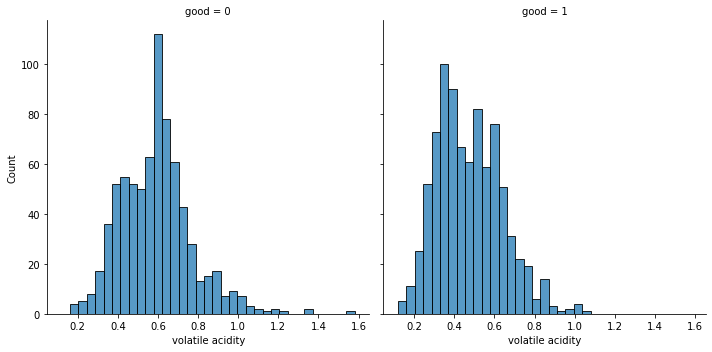

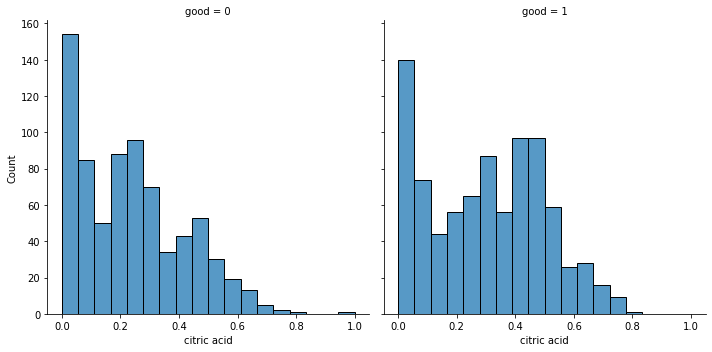

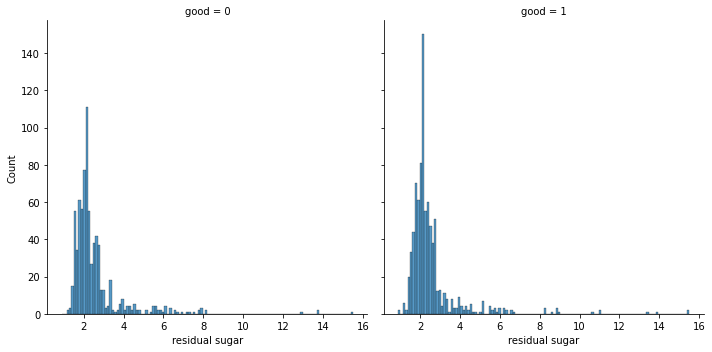

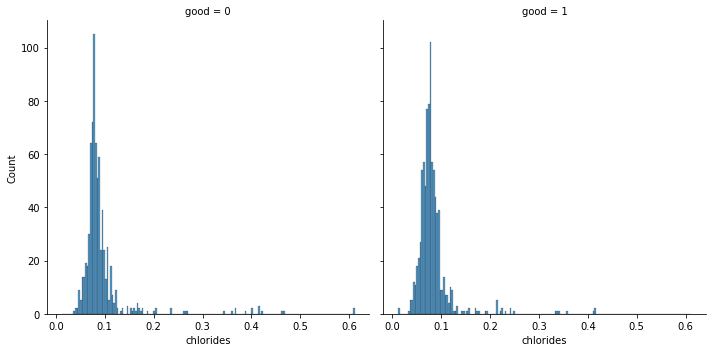

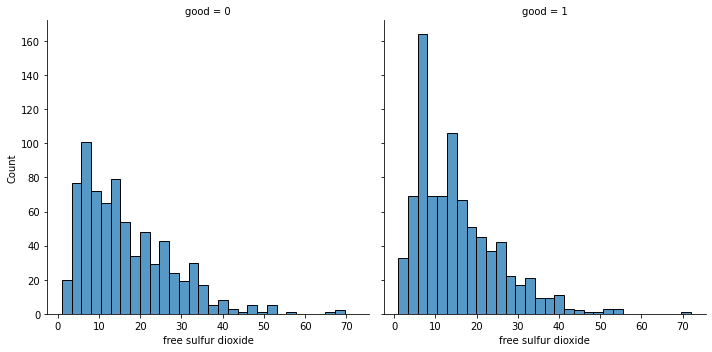

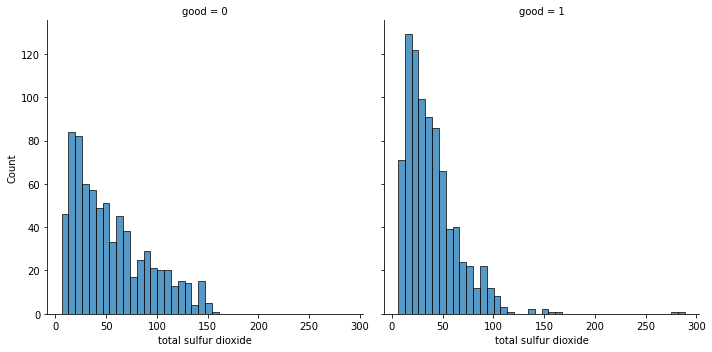

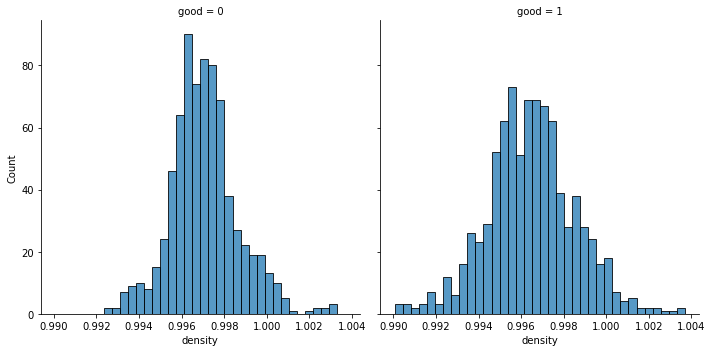

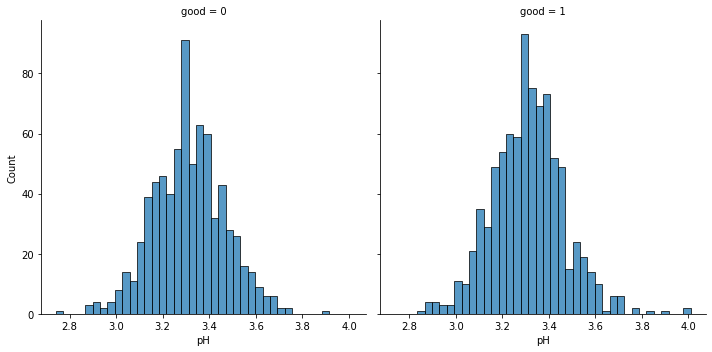

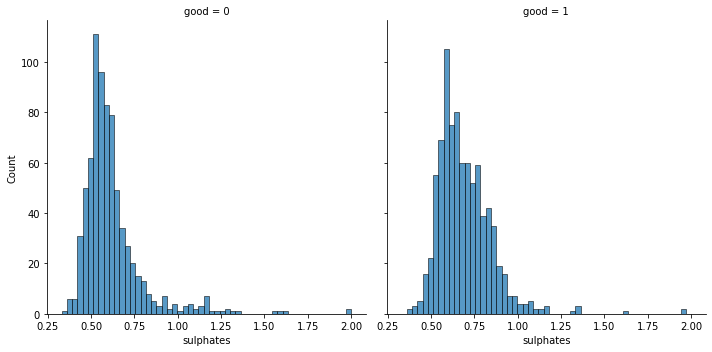

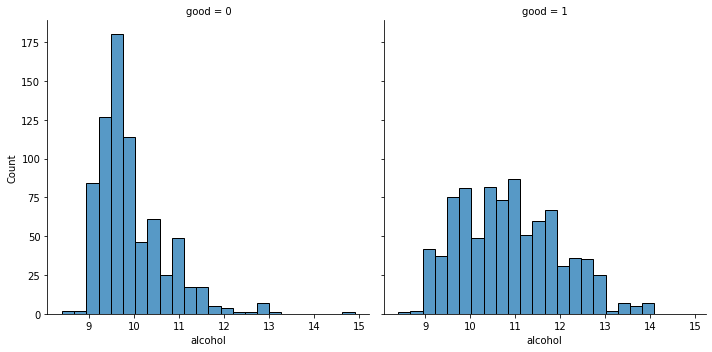

In [16]:
for i in df.columns:
    if (i != 'good') & (i != 'quality') : sns.displot(df, x=i, col="good") 

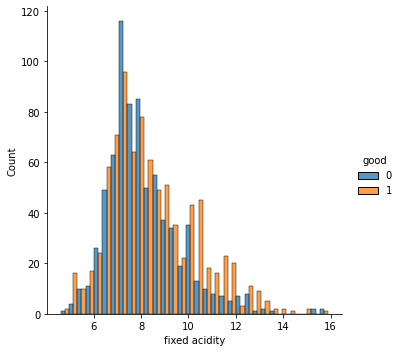

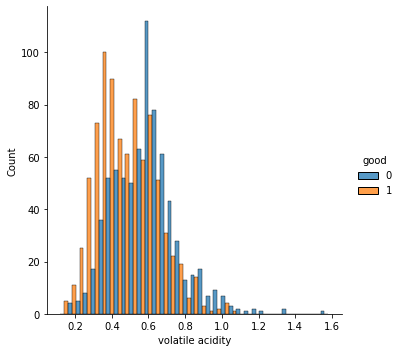

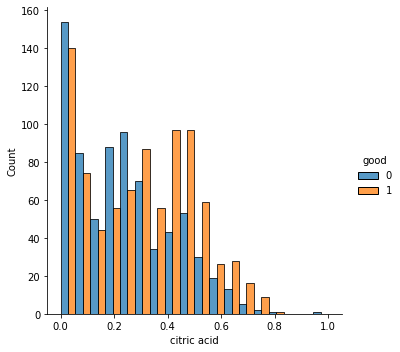

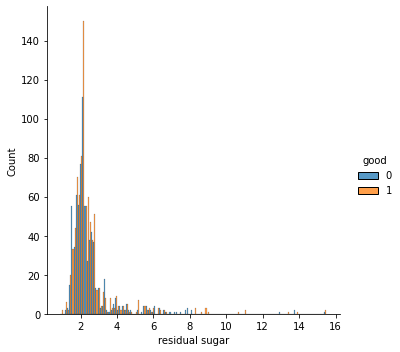

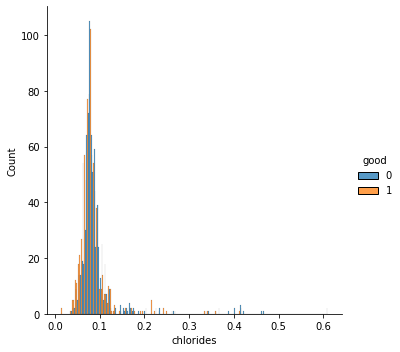

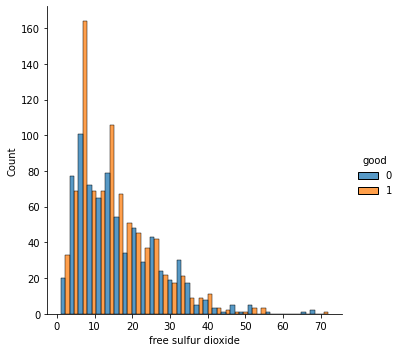

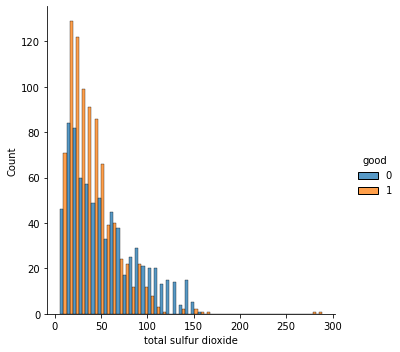

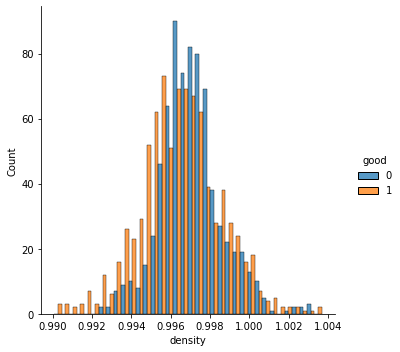

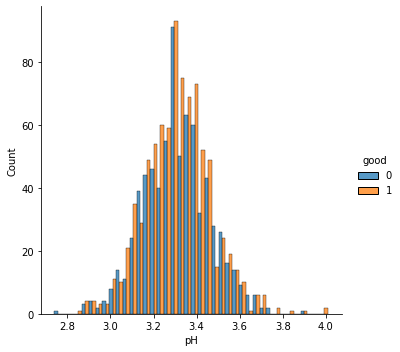

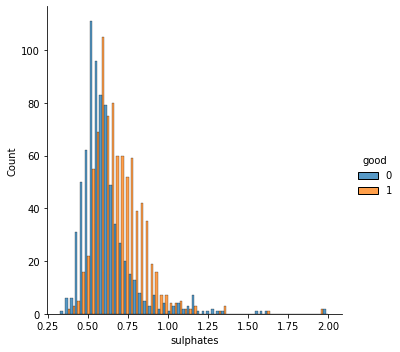

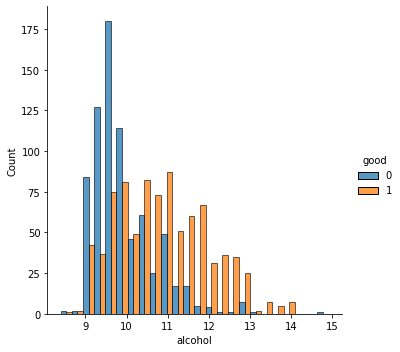

In [17]:
for i in df.columns:
    if (i != 'good') & (i != 'quality') : sns.displot(df, x=i, hue="good", multiple="dodge")

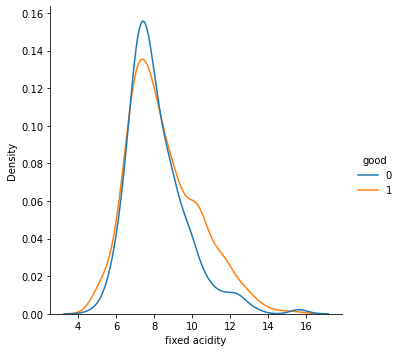

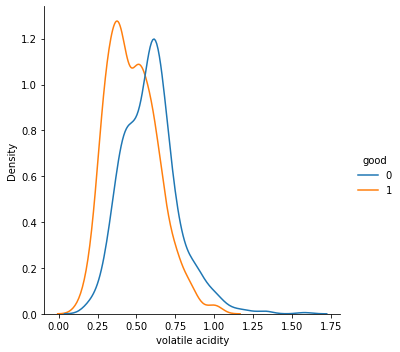

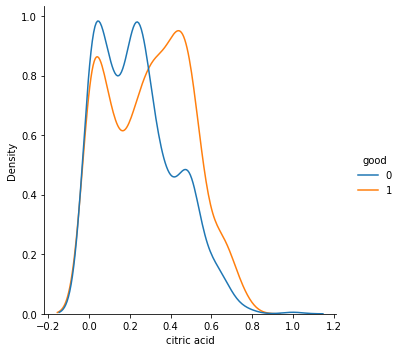

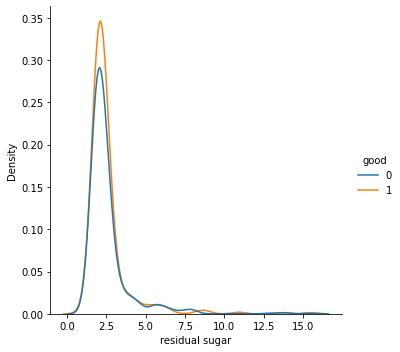

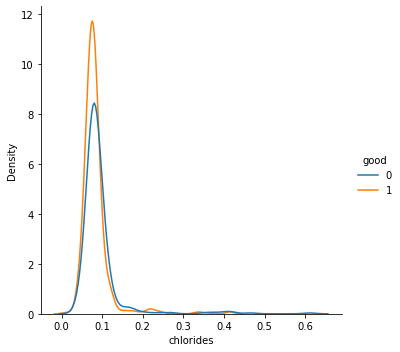

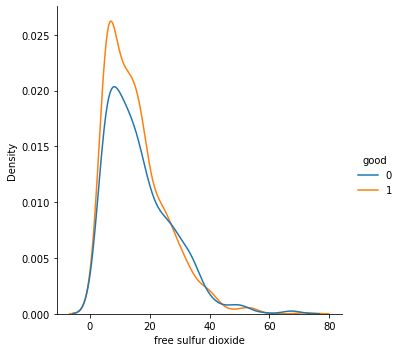

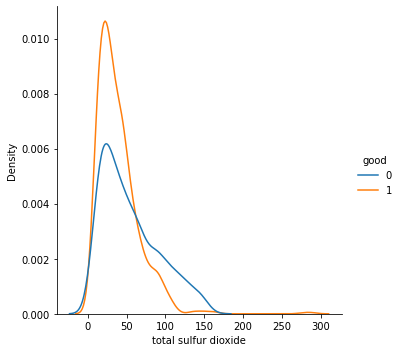

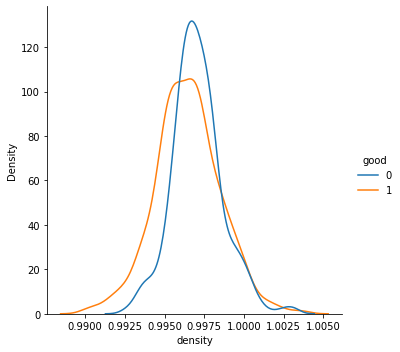

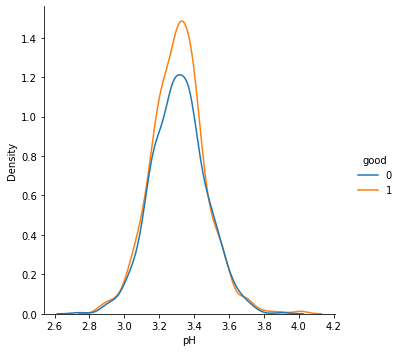

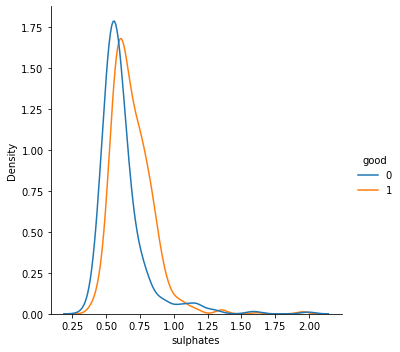

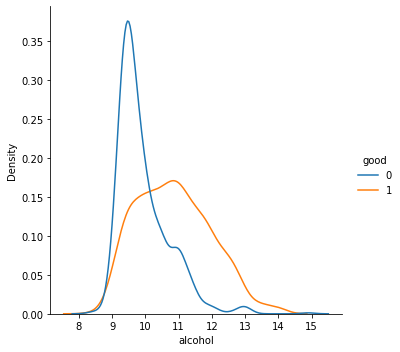

In [19]:
for i in df.columns:
    if (i != 'good') & (i != 'quality') : sns.displot(df, x=i, hue="good", kind="kde")

In [20]:
df['good2'] = df['good'].apply(lambda x: 'good' if x == 1 else 'bad')

In [22]:
df['good2'].value_counts()

good    855
bad     744
Name: good2, dtype: int64

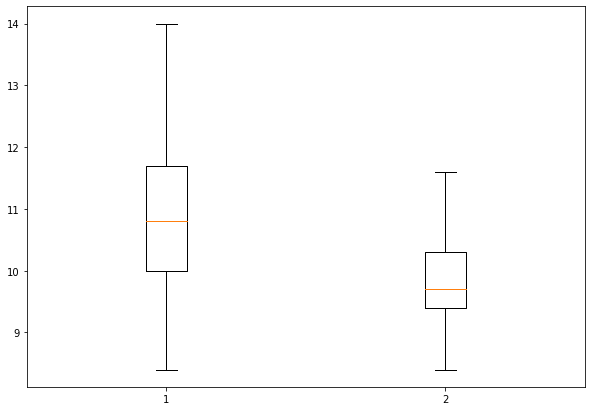

In [9]:
plt.figure(figsize = (10,7))

plt.boxplot([df['alcohol'].loc[df['good']==1], df['alcohol'].loc[df['good']==0]], showfliers = False)



plt.show()

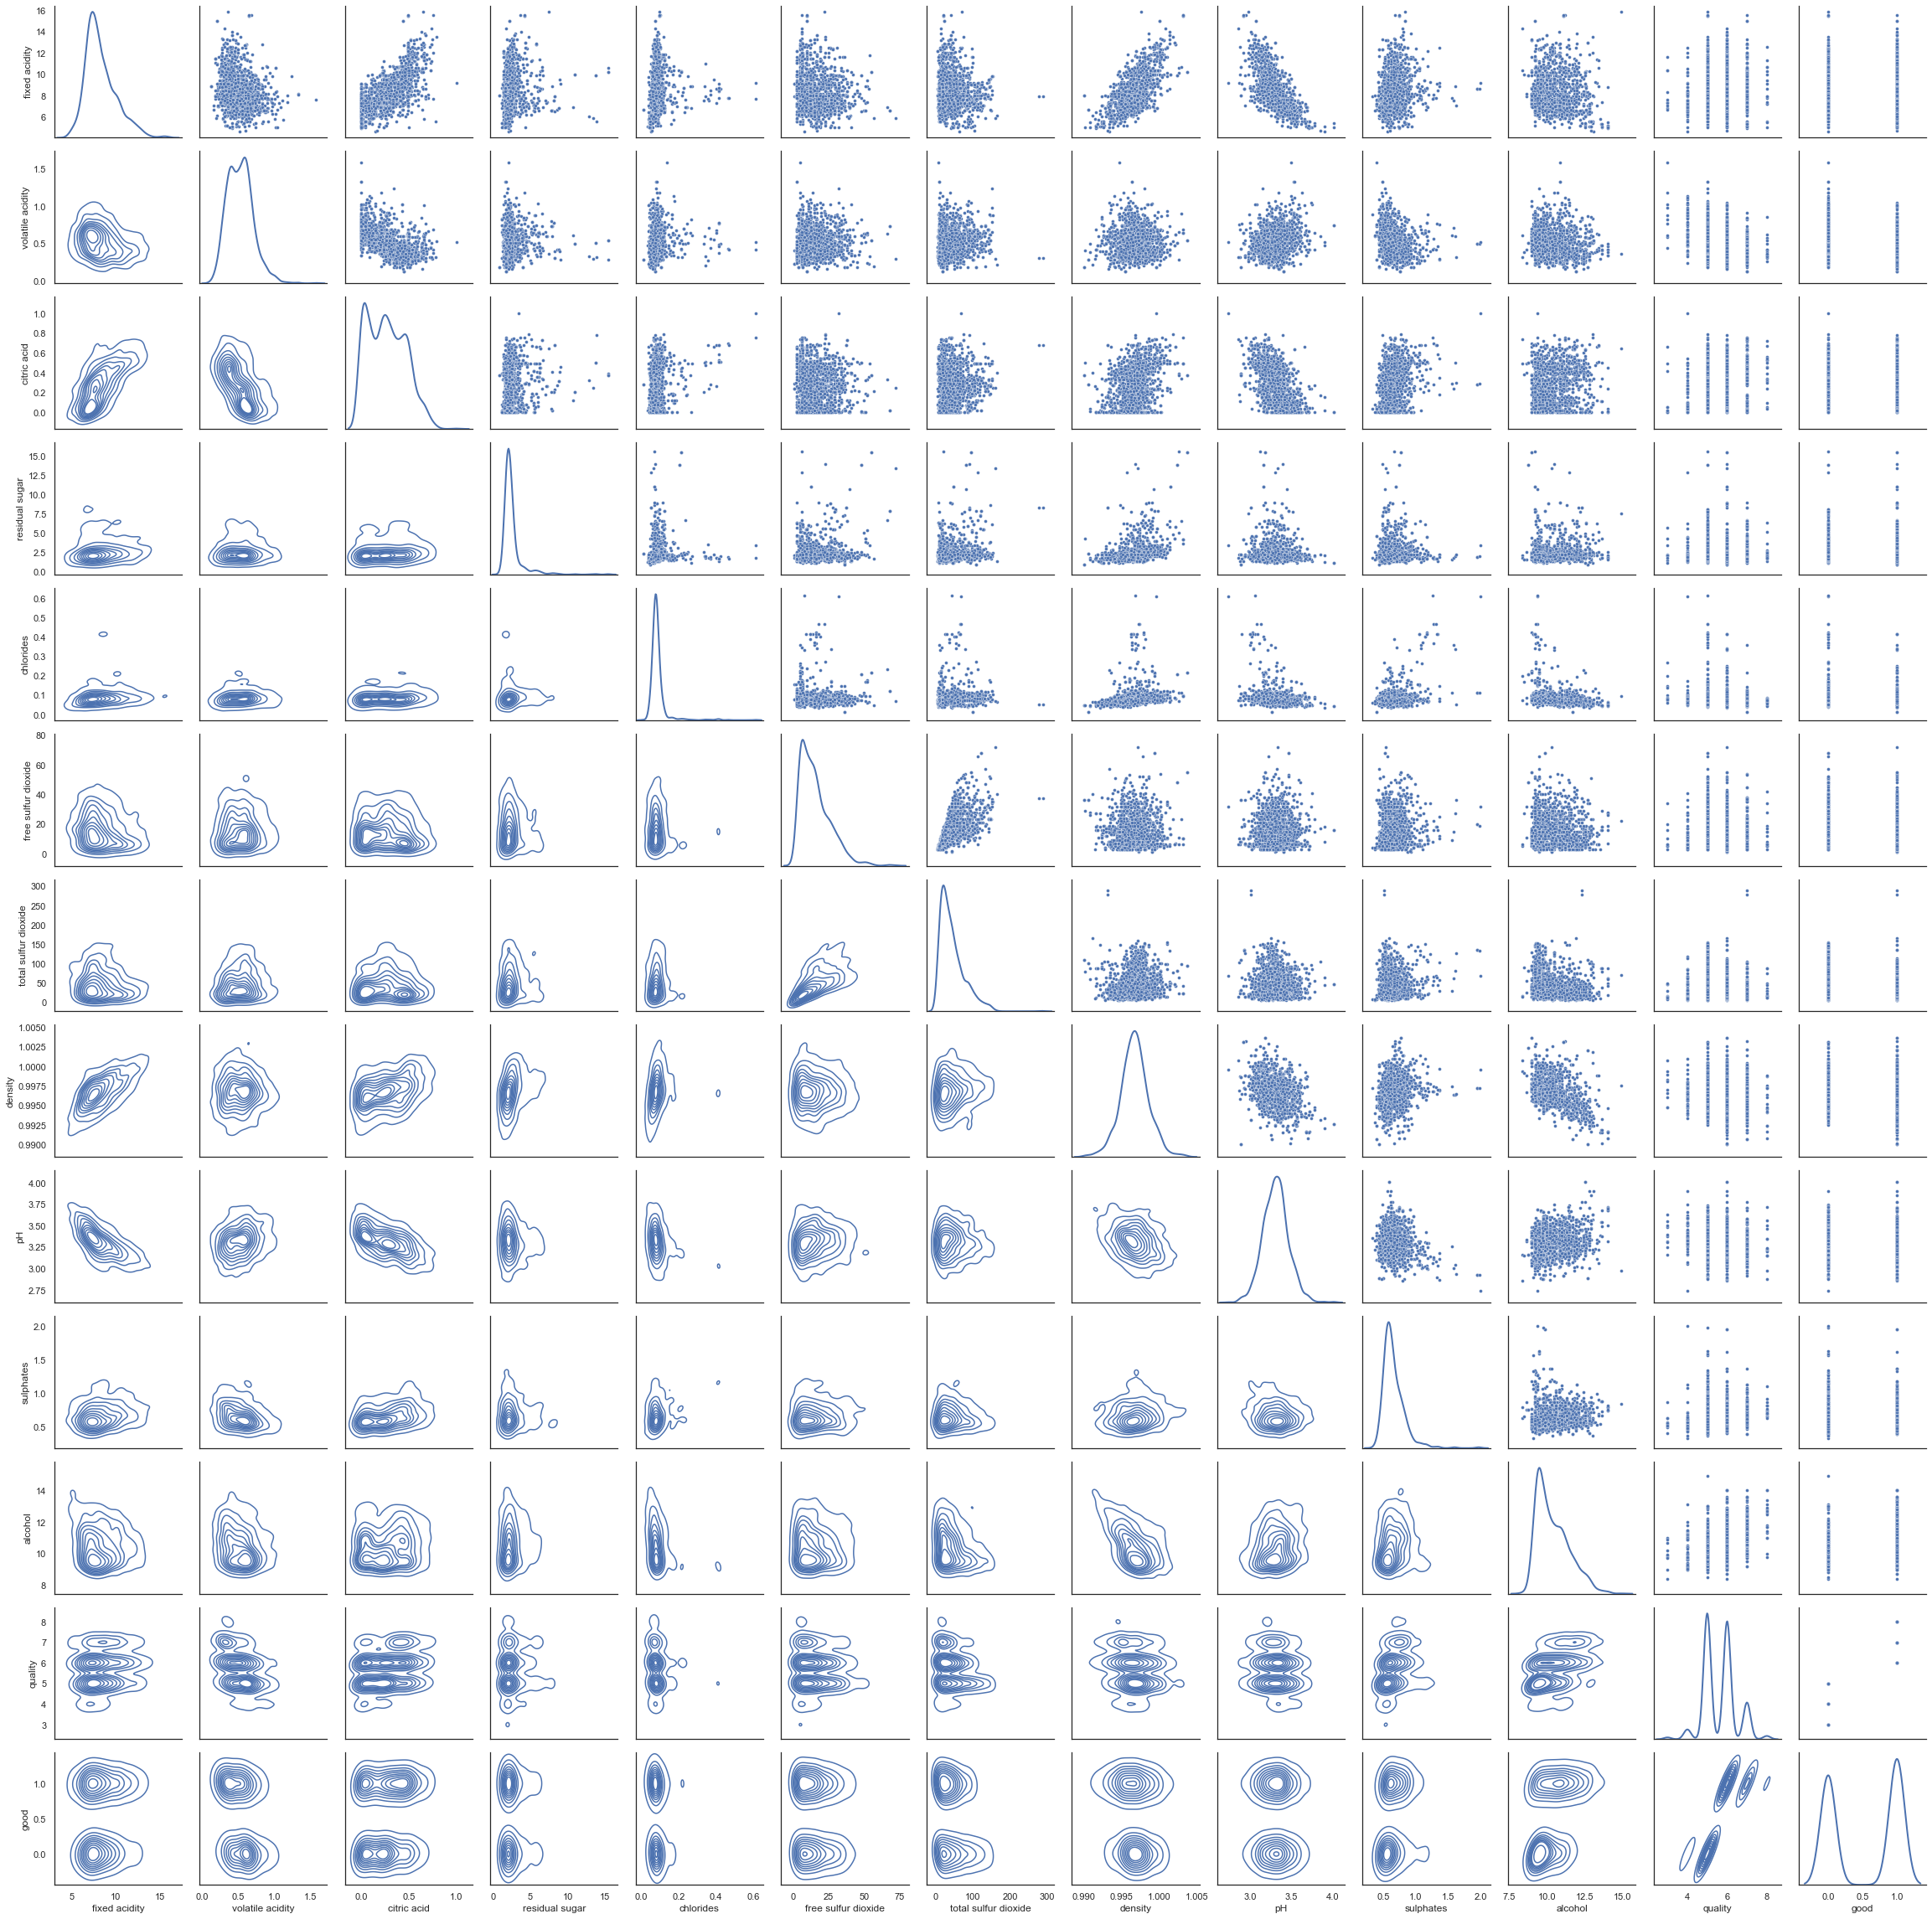

In [37]:
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)